<a href="https://colab.research.google.com/github/sarithamiryala/NLPProjects/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the important libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataScience2024/NLP/sentiment_analysis.csv')

In [ ]:
data.shape

(499, 7)

In [ ]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [ ]:
data.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


In [ ]:
data.value_counts('sentiment')

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

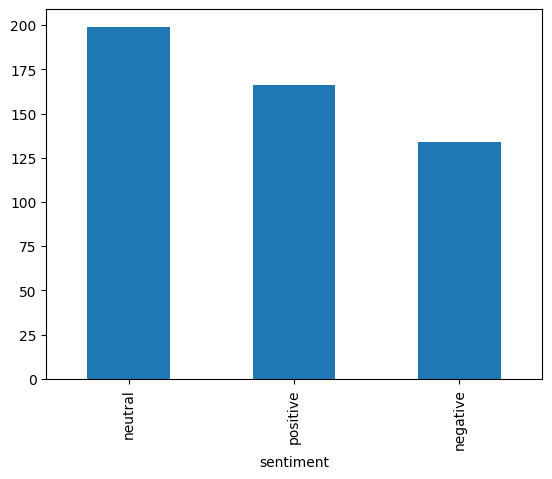

In [ ]:
data.sentiment.value_counts().plot(kind='bar')

<Axes: xlabel='Year'>

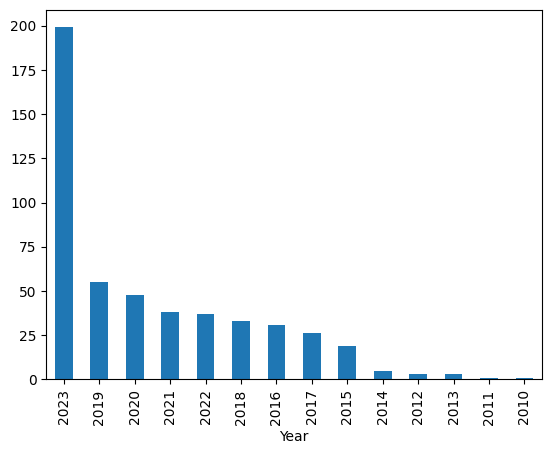

In [ ]:
data.Year.value_counts().plot(kind ='bar')

#Label encoding the target variable

In [ ]:
data.replace({'sentiment':{'neutral':0,'positive': 1,'negative':2}},inplace=True)

In [ ]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,1,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",1,Facebook
2,2017,8,18,night,Don't angry me,2,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,2,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",2,Instagram


In [ ]:
data['text'][376]

' aww I miss driving down elmwood'

In [ ]:
data.Platform.value_counts()

Platform
 Instagram     171
 Facebook      165
 Twitter        91
 Twitter        68
Facebook         4
Name: count, dtype: int64

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# lower casing the text

In [ ]:
data['text'] = data['text'].str.lower()

# Removing the punctuation marks

In [ ]:
def remove_punctuations(text):
  import string
  text_new = "".join([i for i in text if i not in string.punctuation])
  return text_new

In [ ]:
data['text']= data['text'].apply(remove_punctuations)

In [ ]:
data.sample(2)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
231,2023,1,15,morning,screw the reviews i thought wolverine was awes...,1,Twitter
469,2021,8,2,noon,thats just weird oh and what was it you wer...,2,Instagram


# remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
#Using nltk libraries
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stopwords(text):
    # Tokenize the text into words
    word_tokens = word_tokenize(text)

    # Filter out the stopwords
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    # Join the filtered words back into a string
    return ' '.join(filtered_text)

In [ ]:
data['text'] = data['text'].apply(remove_stopwords)

In [ ]:
data['text'][345]

'getting ready work working weekend'

# Stemming

In [ ]:
def stemming(text):
  ps = PorterStemmer()
  text = [ps.stem(word) for word in text.split()]
  return ' '.join(text)

In [ ]:
data['text'] = data['text'].apply(stemming)

In [ ]:
data['text'][345]

'get readi work work weekend'

# Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = data['text']
y = data['sentiment']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [ ]:
X_train

56                                      bad headech need
227                        happi mother day mother world
280           get readi week nice today stuck insid work
486                    back soon need run shop cut grass
220               error red life blue love rose lip babi
                             ...                        
106    car happi big big dent boot hope theyr go writ...
270                    shirt dinner need ask actual vill
348                          comput hopeless everyth els
435              waterfront anymor faccia luna clarendon
102    born rais nyc live texa past 10 year still mis...
Name: text, Length: 399, dtype: object

In [ ]:
X_test

460         peopl pencil sharp sharpen pencil philosophi
73                                            soooo high
231    screw review thought wolverin awesom enough do...
175                                            hell yeah
237                                     alway want go oz
                             ...                        
247                              im sleep accept appolog
384                    make face get home mom watch soap
19                                 never fall love found
321                       ohh tooth hurt ohh im sad hurt
331                                              k check
Name: text, Length: 100, dtype: object

In [ ]:
y_test

460    0
73     0
231    1
175    0
237    0
      ..
247    2
384    0
19     1
321    2
331    0
Name: sentiment, Length: 100, dtype: int64

# Vectorizing using TF-IDF

In [ ]:
# Vectorization
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
y_train

56     2
227    1
280    1
486    0
220    1
      ..
106    0
270    0
348    2
435    2
102    2
Name: sentiment, Length: 399, dtype: int64

In [ ]:
X_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30053098, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
def preprocessing(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]','',text)
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  stemmer = PorterStemmer()
  stemmed_text = [stemmer.stem(word) for word in filtered_text]
  return ' '.join(stemmed_text)

In [ ]:
sample = "I am really very much angry with you"

In [ ]:
def val_to_category(val):
    category_map = {
       0:'neutral',
        1:'positive',
        2:'negative'
     }
    return category_map.get(val,-1)

In [ ]:
def model_prediction(text):
  text = preprocessing(text)
  text = tfidf.transform([text])
  val = rf.predict(text)
  val = val_to_category(int(val[0]))
  print('Sentiment is', val)


In [ ]:
model_prediction("Don't angry me")

Sentiment is negative


In [ ]:
model_prediction('i want to drink water')

Sentiment is neutral


In [ ]:
model_prediction('i am really happy ')

Sentiment is positive


#Using Word2vec Embedding

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocessing_and_vectorizing(text):
  doc = nlp(text)
  filterd_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filterd_tokens.append(token.lemma_)
  return wv.get_mean_vector(filterd_tokens)
